# Student exam scores data exploration
## by (Khaya Monica Moyana)

## Introduction
> I will be analysing the students performance in exams dataset that i found on kaggle. This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Load the students performance in exam dataset and view it
df_student = pd.read_csv('StudentsPerformance.csv')
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
#Check  the structure of the data and if the data types are correct
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [107]:
#View all rows for visual assessment
pd.set_option('display.max_rows', 1000)

In [108]:
#i am going to add an additional column that shows the aggregate of the learners
col = df_student.loc[: , 'math score':'writing score']
df_student['aggregate score'] = col.mean(axis=1)
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,aggregate score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


In [101]:
#Descriptive statistics
df_student.describe()

,math score,reading score,writing score,aggregate score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


### What is the structure of your dataset?

> The data has 1000 rows and 9 columns

### What is/are the main feature(s) of interest in your dataset?

> The aggregate score of learners and how its affected by the other variables

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will investigate whether gender and race affect ones performace. does taking lunch and taking a preparation course help you pass your exam? and also check whether parents level of education contibutes to learners success

## Univariate Exploration


#### What is the distribution of aggregate marks obtained by the students?

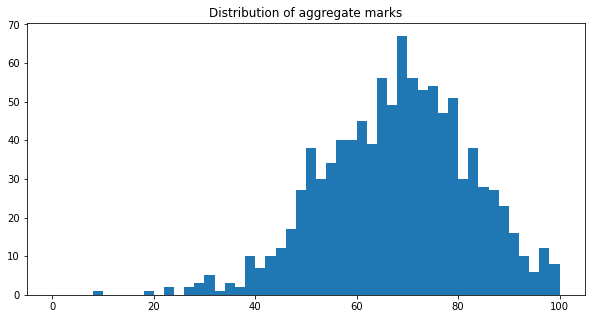

In [20]:
# Histogram that shows the distribution of marks
bin_edge=np.arange(0,100+1.1,1+1)
plt.figure(figsize = [10, 5])
plt.hist(data=df_student, x= 'aggregate score', bins=bin_edge);
plt.title('Distribution of aggregate marks');

In [112]:
# Exclude those that got  a score of zero for math
df_student = df_student[df_student['math score'] > 0]

In [132]:
# Check if it was removed
df_student.describe()

,math score,reading score,writing score,aggregate score
count,999.000000,999.000000,999.000000,999.000000
mean,66.155155,69.221221,68.112112,67.829496
std,15.025594,14.513766,15.091685,14.142512
min,8.000000,23.000000,15.000000,18.333333
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.333333
75%,77.000000,79.000000,79.000000,77.666667
max,100.000000,100.000000,100.000000,100.000000


>this histogram is slightly skewed to the left.This is a great thing as this mean that most of the students aggregate marks peak on the upper side which is 60-80...A pretty good mark 

#### What are the value counts of each categorical variable?

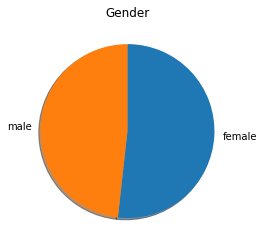

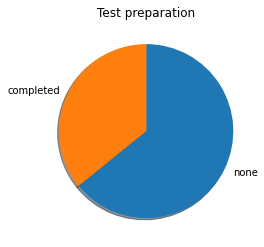

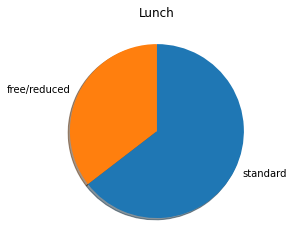

In [114]:
# A pie chart that show the gender distribution

gender_count = df_student['gender'].value_counts()
test_prep= df_student['test preparation course'].value_counts()
lunch=df_student['lunch'].value_counts()


plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False, shadow=True);
plt.title('Gender')
plt.show()


plt.pie(test_prep, labels = test_prep.index, startangle = 90, counterclock = False, shadow=True);
plt.title('Test preparation')
plt.show()

plt.pie(lunch, labels = lunch.index, startangle = 90, counterclock = False, shadow=True);
plt.title('Lunch')
plt.show()



>Gender - There is a fair distribution of males and females. even though the are more females than males 

>Test preparation course - Most students didnt take the test preparation course

> Lunch - Most students ate lunch before taking their tests

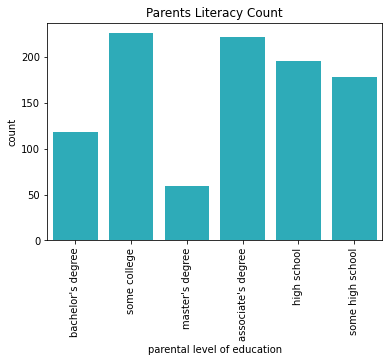

In [115]:
#A bar graph that show the parental literacy
def bar_plot(x_label, chart_title):
    base_color = sb.color_palette()[9]
    sb.countplot(data=df_student, x =x_label, color=base_color);
    plt.xticks(rotation=90);
    plt.title(chart_title);
    plt.show()

bar_plot('parental level of education', 'Parents Literacy Count')

> Almost a quarter of the learners parents ended at high school. about 240 students have 'some college'. The remaining majority of the sudents parents have post high school edudution.

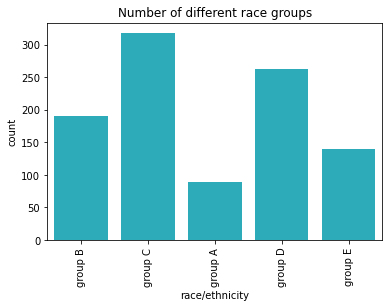

In [116]:
#A barplot that shows ethincity
bar_plot('race/ethnicity', 'Number of different race groups')

Group c is the most dominant race in this dataset. group E and A are part of the minority respectively

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The overall aggregate score is skewed to the left and thats where the highest marks are. Some few learner got and aggregate lower than 18 which seems to be an outlier in this case.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i sliced out those that got a math score of zero because it was an outlier

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### What is the relationship between math, reading and writing score?

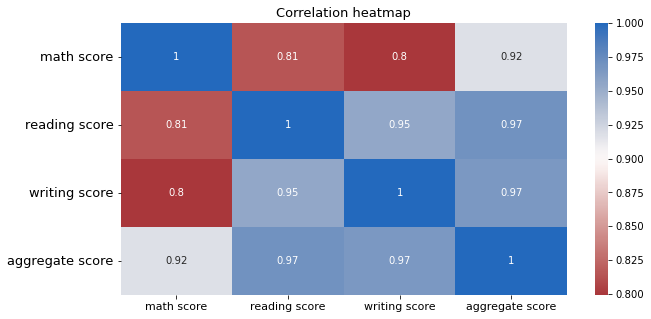

In [117]:
# correlation heatmap
plt.figure(figsize = (10,5))
plot = sb.heatmap(df_student.corr(method="pearson"), annot = True, vmax = 1, cmap = 'vlag_r')
plot.set_xticklabels(plot.get_xmajorticklabels(),fontsize = 11)
plot.set_yticklabels(plot.get_ymajorticklabels(),fontsize = 13)
plot.set_title('Correlation heatmap', fontsize = 13)
plt.yticks(rotation=0)
plt.show()

>All the scores have a very strong correletion. This might mean that most of the students were consistent with their math, reading and writing scores. For simplicity we will just use the aggregate score 

#### Which major factors contribute to test outcomes?

>1. Race

C:\Users\Monica\AppData\Local\Temp\ipykernel_19608\2706905029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['race/ethnicity'] = df_student['race/ethnicity'].astype(races);


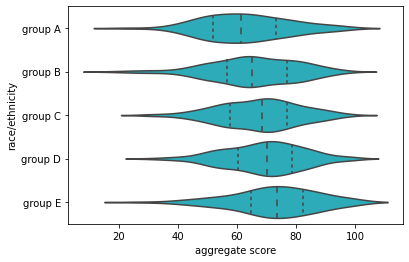

In [131]:
# violin plot of race against aggregate score
race = ['group A', 'group B', 'group C', 'group D', 'group E']
races = pd.api.types.CategoricalDtype(ordered=True, categories=race)
base_color = sb.color_palette()[9]

df_student['race/ethnicity'] = df_student['race/ethnicity'].astype(races);

sb.violinplot(data=df_student, y='race/ethnicity', x='aggregate score', color=base_color, inner='quartile');

to see if those whose marks are greater than 50 came from which race?

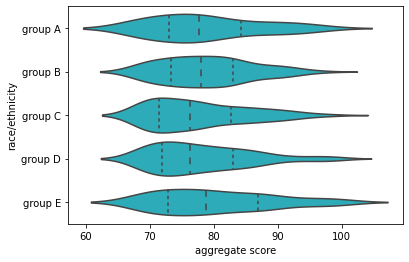

In [119]:
best_race = df_student[df_student['aggregate score'] > 67.77] # Select the race that performed above average

sb.violinplot(data=best_race, y='race/ethnicity', x='aggregate score', color=base_color,inner='quartile');

when we only focus on those that performed above average we notice that group a and b performed better than group c and d in terms of upper quartile, median and lower quartile. It is hard to conclude that race indeed does contribute to your exam success. but those from group E maintained a higher aggregate even though they are the second last race in this data set

>2. Lunch

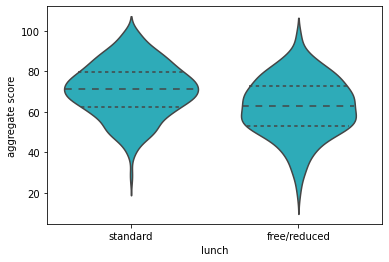

In [133]:
# violin plot of lunch against aggregate score
sb.violinplot(data=df_student, x='lunch', y='aggregate score', color=base_color,inner='quartile');

Students who had lunch did really well on their overall exam score

>3. Test preparation course

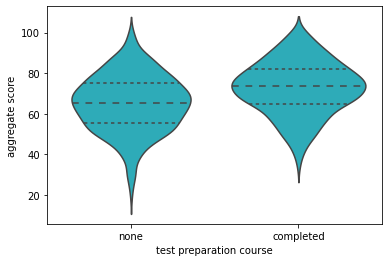

In [129]:
# test preparation course against aggregate score
sb.violinplot(data=df_student, x='test preparation course', y='aggregate score', color=base_color,inner='quartile');

students who took the preparation course did exceptionally well on their exams

>4. Parental level of education

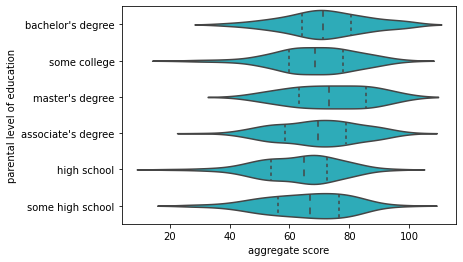

In [123]:
base_color = sb.color_palette()[9]
sb.violinplot(data=df_student, y='parental level of education', x='aggregate score', color=base_color,inner='quartile');

students whose parents have a masters and bachelors degree performed quite well. they didnt get anything less than 30 and their marks are concentrated towards 65 and 85 which is a good overall mark. Those with lower level of education range from 0 and start to peak at around 55 and 78 which is an average score. But we can also check at how likely are parents with higher education level are likely to enrol their kids for a preparation course. 

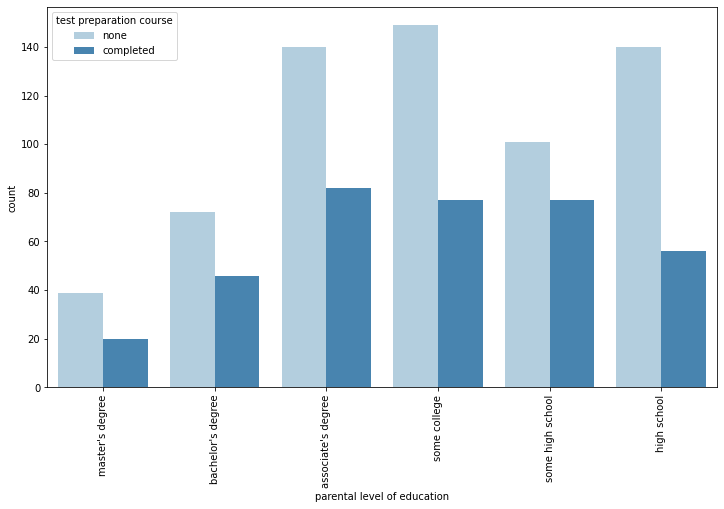

In [124]:
# Number of parents who enroled their kids for a prep course
x= ("master's degree", "bachelor's degree", "associate's degree", "some college", "some high school", "high school");
plt.figure(figsize = [12,7])
sb.countplot(x="parental level of education",hue="test preparation course", data=df_student, palette="Blues", order=x);
plt.xticks(rotation=90);

When looking at the difference between those that took the prep course and those that didnt, students whose parents have some highschool have the lowest diffence.so what im trying to bring up here is that, when the parent has a lower level of education it does'nt mean that they will enrol their kid for a prep test to supplement their studies. Enrolling for the test preparation course is based solely on choice.  

>5.gender

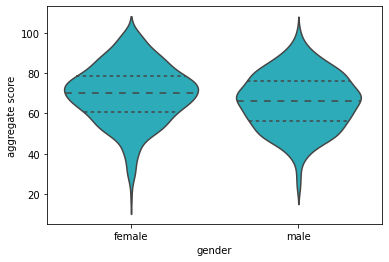

In [137]:
sb.violinplot(data=df_student, x='gender', y='aggregate score', color=base_color,inner='quartile');


There is a slight difference between the peformance of females and males. But it is not enough to conclude that gender contributes to performace of a student

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> here we noticed that the only race that seems to have a higher aggregate score is group E the others fluctuate as you investigate different factors. Taking lunch and also taking a preparation course produces a high aggregate score

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that taking the test prepation course was by choice of the student

## Multivariate Exploration

>Which  gender is more likely to take lunch?

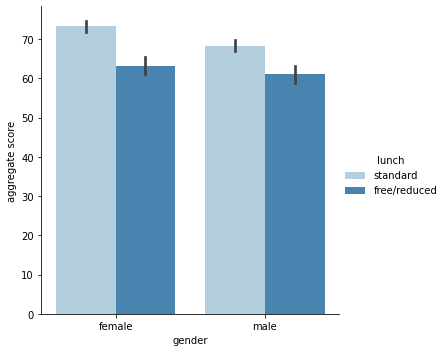

In [70]:
# A bar plot that shows females and males who took /did'nttake lunch and their aggregate score.
sb.catplot(x="gender", y="aggregate score",hue="lunch", kind="bar", data=df_student,palette="Blues");

Females were more likely to take lunch when compared to males. They also passed very well followed by males who took lunch

>How did learners who took lunch and the test preparation course perform?

<Figure size 1440x1080 with 0 Axes>

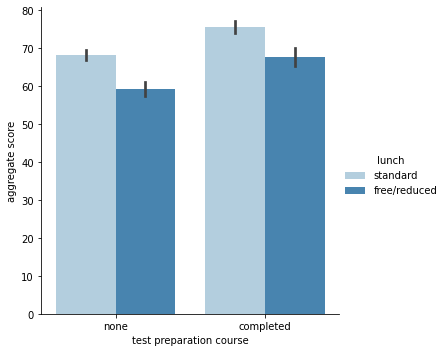

In [136]:
sb.catplot(x="test preparation course", y="aggregate score",hue="lunch", kind="bar", data=df_student, palette="Blues");

It is clear that in both learners who took the preparation course and those that didnt, those who ate standard lunch performed better. But also, taking lunch and a prepation course had an overall success rate in the exams

>What is the performace based on race and gender?

<Figure size 1440x1080 with 0 Axes>

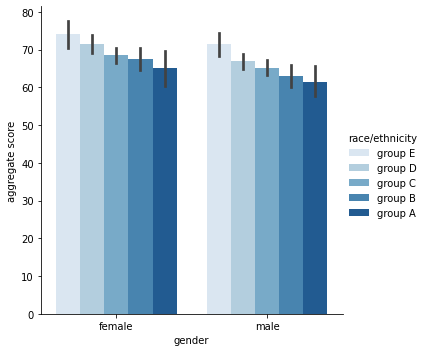

In [68]:
#Effect of gender and race on aggregate score
plt.figure(figsize = (20,15))
row = ('group E', 'group D', 'group C', 'group B','group A')
sb.catplot(x="gender", y="aggregate score",hue="race/ethnicity", kind="bar", data=df_student, hue_order=row, palette="Blues");

group A is the least performing race in both females and males. when investigating different factors within race only group E maintained a consistant high pass rate with in their exams. But besides group A there is no other consitent race that is consistant with their pass mark. Except group E,belonging to a particular race or ethnicity doesnt guarantee one success or failure in their exams

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Taking both lunch and the preparation course produced significantly higher results

### Were there any interesting or surprising interactions between features?

> It became very evident that taking lunch and a test preparation course resulted in excellent exam scores

## Conclusions

I will convey my summary by answering the following questions.
>How effective is the test preparation course?

Students who took the test prepartion course were most likely to pass their exams. This was tested by plotting a graph that checks the aggregate score against students who took the preparation course. out of interest, i also looked at the number of students who took the preparation course based on their parents level of education. I found that their parents level of education has no influence on them taking the course. They took the test based solely by choice.

>Which major factors contribute to test outcomes?

1. It was found that taking standard lunch alone or taking the preparatory course alone produces excellent results.
2. Having both lunch and the preparation course was even more effective 
3. Students whose race is group E mostly excelled in their exams but this wasn't enough to conclude that belonging to group E gurantees success as they are minority.
4. Gender seems to have no effect on the students exams scores as the difference between male and females is not that major

>What would be the best way to improve student scores on each test?

The best way to improve student scores is if they take the test prepartion course and also eat healthy lunch to boost their dopamine levels